In [1]:
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw

import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import numpy as np

from pyutils.pyplot import Plot

In [2]:
ana_labels = {
    "Before" : [
        "preselection_CRY_onspill-LH_aw_bug",
        "preselection_signal_onspill-LH_aw_bug"
    ],
    
    "After" : [
        "preselection_CRY_onspill-LH_aw",
        "preselection_signal_onspill-LH_aw"
    ]
}

In [3]:
def load(ana_labels):
    results = {}
    for key, ana_labels_list in ana_labels.items():  
        results[key] = {}  
        for ana_label in ana_labels_list:
            loader = Load(
                in_path=f"../../output/results/{ana_label}"
            )
            results[key][ana_label] = loader.load_pkl() 
    return results

results = load(ana_labels)

[Load] ✅ Initialised with out_path=../../output/results/preselection_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/preselection_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_signal_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/preselection_signal_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/preselection_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/preselection_signal_onspill-LH_aw/results.pkl


In [4]:
plot = Plot() # just for style file

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


In [5]:
def plot_hists(hist_name, axis, data_configs, styles, **plot_settings):
    """Plot multiple histograms with settings unpacked from kwargs."""
    
    # Extract ylim_factor, default to 1.2 if not provided
    ylim_factor = plot_settings.pop("ylim_factor", 1.2)
    
    for config in data_configs:  # This loops through your data configurations
        hist_obj = results[config["reco"]][config["analysis"]]["hists"][hist_name]
        h_sel = hist_obj[{"selection": ["Preselect"]}]
        
        h_sel.plot1d(
            **styles[config["label"]],
            overlay="selection", 
            ax=axis, 
            label=config["label"], 
            flow="none"
        )
    
    axis.set_yscale("log")
    
    # Extend y-axis
    ylim = axis.get_ylim()
    axis.set_ylim(ylim[0], ylim[1] * ylim_factor)
    
    # Apply legend with remaining kwargs
    axis.legend(**plot_settings)

In [16]:
labels = labels = ["CRY (before)", "CRY (after)", "CeEndpoint (before)", "CeEndpoint (after)"]

# Data configuration
data_configs = [
    {"reco": "Before", "analysis": "preselection_CRY_onspill-LH_aw_bug", "label": labels[0]},
    {"reco": "After", "analysis": "preselection_CRY_onspill-LH_aw", "label": labels[1]},
    {"reco": "Before", "analysis": "preselection_signal_onspill-LH_aw_bug", "label": labels[2]},
    {"reco": "After", "analysis": "preselection_signal_onspill-LH_aw", "label": labels[3]}
]


styles = {
    "CRY (before)": {"color": "#C41E3A", "linewidth": 2},
     "CRY (after)": {"color": "#C41E3A", "histtype": "bar", "alpha": 0.4}, 
     "CeEndpoint (before)": {"color": "#228B22", "linewidth": 2}, 
     "CeEndpoint (after)": {"color": "#228B22", "histtype": "bar", "alpha": 0.4}
}

Wrote ../../output/images/comp/h1o_t0err.png


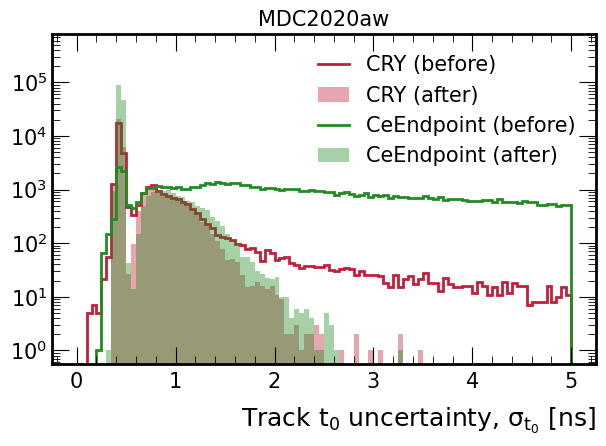

In [17]:
# Subplot styling 
subplot_configs = [
    {"hist": "t0err", "loc": "upper right", "ncol": 1, "ylim_factor": 5}
]

fig, ax = plt.subplots() 

# Get the configuration and extract the histogram name
subplot_config = subplot_configs[0].copy()  # Get first (and only) config
hist_name = subplot_config.pop("hist")  # Remove hist name from settings

plot_hists(
    hist_name, ax, data_configs, styles,  # Use the extracted hist_name
    **subplot_config  # Unpack the remaining settings (without 'hist')
)

ax.set_title("MDC2020aw")
plt.tight_layout()
out_path="../../output/images/comp/h1o_t0err.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")

plt.show()

Wrote ../../output/images/comp/h1o_2x3_trk_aw_reproc.png


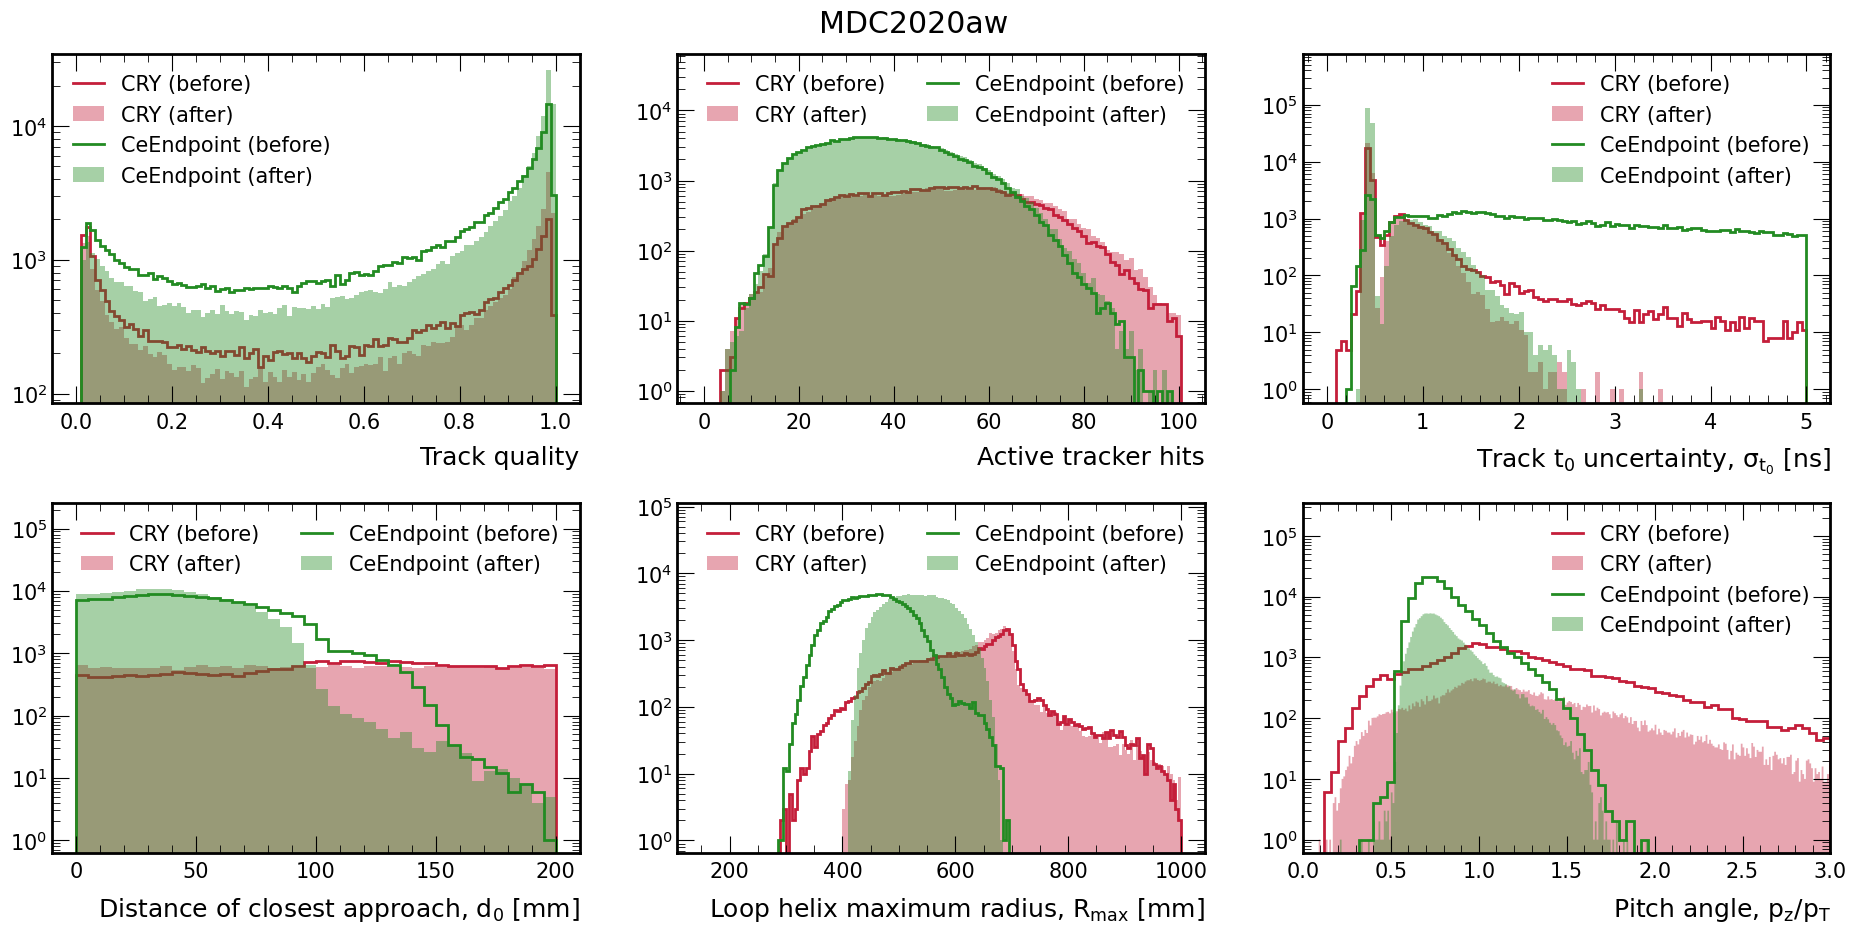

In [18]:
# Subplot styling 
subplot_configs = [
    # Row 0
    {"hist": "trkqual",    "loc": "upper left",  "ncol": 1, "ylim_factor": 1},
    {"hist": "nactive",    "loc": "upper right", "ncol": 2, "ylim_factor": 10},
    {"hist": "t0err",      "loc": "upper right", "ncol": 1, "ylim_factor": 5},
    # Row 1  
    {"hist": "d0",         "loc": "upper right",  "ncol": 2, "ylim_factor": 15},
    {"hist": "maxr",       "loc": "upper right", "ncol": 2, "ylim_factor": 15},
    {"hist": "pitch_angle","loc": "upper right",  "ncol": 1, "ylim_factor": 10}
]

fig, ax = plt.subplots(2, 3, figsize=(6.4*3, 4.8*2))

# Plot with both configurations
for subplot_config, axis in zip(subplot_configs, ax.flat):
    subplot_config_copy = subplot_config.copy()  # Don"t modify original
    hist_name = subplot_config_copy.pop("hist")
    
    plot_hists(
        hist_name, axis, data_configs, styles,  # Use data_configs here
        **subplot_config_copy
    )

# Details
ax[1,2].set_xlim(0, 3)

plt.suptitle("MDC2020aw")
# Add padding at the top for the suptitle
plt.tight_layout(rect=[0, 0, 1, 1.02])

out_path="../../output/images/comp/h1o_2x3_trk_aw_reproc.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")

# plt.tight_layout()
plt.show()

Wrote ../../output/images/comp/h1o_1x3_mom_aw_reproc.png


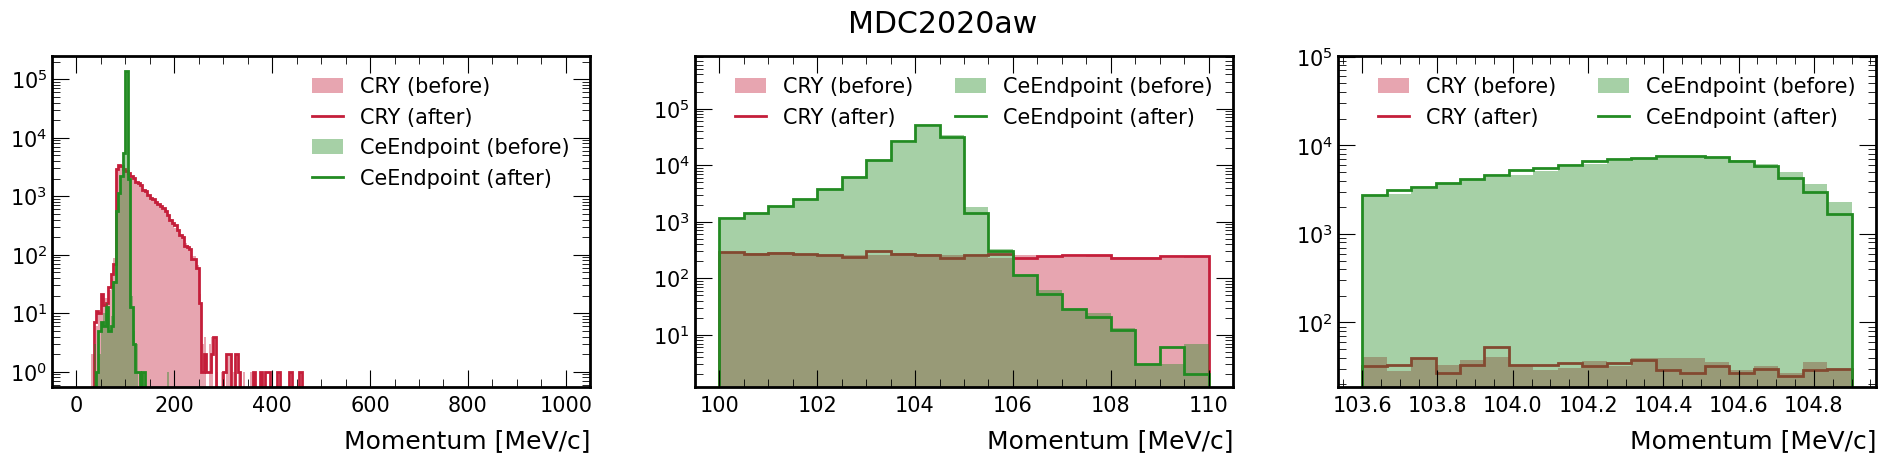

In [10]:
# Subplot styling 
subplot_configs = [
    {"hist": "mom_full",    "loc": "upper right",  "ncol": 1, "ylim_factor": 1},
    {"hist": "mom_ext",    "loc": "upper right", "ncol": 2, "ylim_factor": 10},
    {"hist": "mom_sig",      "loc": "upper right", "ncol": 2, "ylim_factor": 10}
]

fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8))

# Plot with both configurations
for subplot_config, axis in zip(subplot_configs, ax.flat):
    subplot_config_copy = subplot_config.copy()  # Don"t modify original
    hist_name = subplot_config_copy.pop("hist")
    
    plot_hists(
        hist_name, axis, data_configs, styles,  # Use data_configs here
        **subplot_config_copy
    )

plt.suptitle("MDC2020aw")
# Add padding at the top for the suptitle
plt.tight_layout(rect=[0, 0, 1, 1.075])

out_path="../../output/images/comp/h1o_1x3_mom_aw_reproc.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")

# plt.tight_layout()
plt.show()

In [34]:
from pyutils.pylogger import Logger
logger = Logger()
# Efficiencies 
def get_eff(results):
    """
    Extract efficiency data from the nested results dictionary.
    Returns nested dictionaries with the same structure as results.
    """
    sig_eff_dict, veto_eff_dict = {}, {}
    # eff_dict = {}
    
    # Iterate through top-level keys (e.g., "SU2020c", "SU2020d")
    for key in results.keys():

        # eff_dict[key] = {}
        sig_eff_dict[key] = {}
        veto_eff_dict[key] = {}
        
        # Iterate through analysis labels for this key
        for ana_label in results[key].keys():

            print(key, ana_label)
            analysis = results[key][ana_label]["analysis"]

            print(50*"=")

            display(analysis)
            try:
        
                if "signal" in ana_label:
                    print(f"Processing signal: {ana_label}")

                    try:
                    
                        sig_eff          = float(analysis.at[2, "CE-like (wide)"])
                        sig_eff_err_low  = abs(float(analysis.at[3, "CE-like (wide)"]))
                        sig_eff_err_hi   = float(analysis.at[4, "CE-like (wide)"])
                        sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                        
                        sig_eff_dict[key][ana_label] = {
                            "sig_eff": sig_eff,
                            "sig_eff_err": sig_eff_err
                        }

                    except: 

                        try: 
                            sig_eff          = float(analysis.iloc[0, 3])
                            sig_eff_err_low  = abs(float(analysis.iloc[0, 4]))
                            sig_eff_err_hi   = float(analysis.iloc[0, 5])
                            sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                            
                            sig_eff_dict[key][ana_label] = {
                                "sig_eff": sig_eff,
                                "sig_eff_err": sig_eff_err
                            }

                        except Exception as e: 
                            logger.log(f"Failed: {e}", "error")
                        
                elif "CRY" in ana_label:     
                    print(f"Processing CRY: {ana_label}")

                    try: 
                        veto_eff         = float(analysis.at[2, "No veto (wide)"])
                        veto_eff_err_low = abs(float(analysis.at[3, "No veto (wide)"]))
                        veto_eff_err_hi  = float(analysis.at[4, "No veto (wide)"])
                        veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                
                        veto_eff_dict[key][ana_label] = {
                            "veto_eff": veto_eff,
                            "veto_eff_err": veto_eff_err
                        }

                    except: 

                        try: 
                                
                            veto_eff         = float(analysis.iloc[3, 3])
                            veto_eff_err_low = abs(float(analysis.iloc[3, 4]))
                            veto_eff_err_hi  = float(analysis.iloc[3, 5])
                            veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                    
                            veto_eff_dict[key][ana_label] = {
                                "veto_eff": veto_eff,
                                "veto_eff_err": veto_eff_err
                            }
                            
                        except Exception as e: 
                            logger.log(f"Failed: {e}", "error")
                        
                logger.log("Success", "success")
                    
            except Exception as e:
                logger.log(f"Failed: {e}", "error")
                  
            print(50*"=")

    
    return sig_eff_dict, veto_eff_dict

sig_eff_dict, veto_eff_dict = get_eff(results)

Before preselection_CRY_onspill-LH_aw_bug


,Type,k,N,Eff [%],Eff Err$-$ [%],Eff Err$+$ [%],Rate 1batch [$\text{day}^{-1}$],Rate 1batch Err$-$ [$\text{day}^{-1}$],Rate 1batch Err$+$ [$\text{day}^{-1}$],Rate 2batch [$\text{day}^{-1}$],Rate 2batch Err$-$ [$\text{day}^{-1}$],Rate 2batch Err$+$ [$\text{day}^{-1}$]
0,CE-like (wide),38453,5030599755,0.000764,-3.888090e-06,3.907968e-06,821.691647,-4.167124,4.188390,627.752003,-3.183580,3.199826
1,CE-like (ext),5070,5030599755,0.000101,-1.405511e-06,1.425390e-06,108.339444,-1.513134,1.534494,82.768644,-1.155997,1.172315
2,CE-like (sig),692,5030599755,0.000014,-5.130729e-07,5.329512e-07,14.787159,-0.558952,0.580567,11.297022,-0.427025,0.443539
3,No veto (wide),0,38453,100.000000,-2.600510e-03,0.000000e+00,0.000000,0.000000,0.024348,0.000000,0.000000,0.018601
4,No veto (ext),0,5070,100.000000,-1.971998e-02,0.000000e+00,0.000000,0.000000,0.024348,0.000000,0.000000,0.018601
5,No veto (sig),0,692,100.000000,-1.443001e-01,0.000000e+00,0.000000,0.000000,0.024348,0.000000,0.000000,0.018601


Processing CRY: preselection_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success
Before preselection_signal_onspill-LH_aw_bug


,Type,k,N,Eff [%],Eff Err$-$ [%],Eff Err$+$ [%],Rate 1batch [$\text{day}^{-1}$],Rate 1batch Err$-$ [$\text{day}^{-1}$],Rate 1batch Err$+$ [$\text{day}^{-1}$],Rate 2batch [$\text{day}^{-1}$],Rate 2batch Err$-$ [$\text{day}^{-1}$],Rate 2batch Err$+$ [$\text{day}^{-1}$]
0,CE-like (wide),147113,400000,36.77825,-0.076210,0.076276,409.280135,-1.061171,1.063936,312.679855,-0.810708,0.812821
1,CE-like (ext),137558,400000,34.38950,-0.075066,0.075144,382.697361,-1.026131,1.028896,292.371276,-0.783938,0.786051
2,CE-like (sig),101727,400000,25.43175,-0.068793,0.068916,283.012652,-0.882426,0.885192,216.214635,-0.674152,0.676265


Processing signal: preselection_signal_onspill-LH_aw_bug
[pylogger] ✅ Success
After preselection_CRY_onspill-LH_aw


,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,38923,5121,653,0,0,0
1,N,5030599755,5030599755,5030599755,38923,5121,653
2,Eff [%],0.000774,0.000102,0.000013,100.0,100.0,100.0
3,Eff Err$-$ [%],-0.000004,-0.000001,-0.0,-0.002569,-0.019524,-0.152905
4,Eff Err$+$ [%],0.000004,0.000001,0.000001,0.0,0.0,0.0
5,Rate 1B [$\text{day}^{-1}$],831.734948,109.429249,13.953779,0.0,0.0,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-4.192514,-1.520725,-0.542967,0.0,0.0,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],4.213779,1.542085,0.564594,0.024348,0.024348,0.024348
8,Rate 2B [$\text{day}^{-1}$],635.424836,83.601228,10.66034,0.0,0.0,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-3.202976,-1.161796,-0.414813,0.0,0.0,0.0


Processing CRY: preselection_CRY_onspill-LH_aw
[pylogger] ✅ Success
After preselection_signal_onspill-LH_aw


,Type,CE-like (wide),CE-like (ext),CE-like (sig)
0,k,148796,139253,103134
1,N,400000,400000,400000
2,Eff [%],37.199,34.81325,25.7835
3,Eff Err$-$ [%],-0.07639,-0.075284,-0.069105
4,Eff Err$+$ [%],0.076454,0.07536,0.069226
5,Rate 1B [$\text{day}^{-1}$],413.962376,387.412986,286.927039
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-1.067223,-1.032433,-0.888508
7,Rate 1B Err$+$ [$\text{day}^{-1}$],1.069989,1.035199,0.891274
8,Rate 2B [$\text{day}^{-1}$],316.25697,295.973896,219.205129
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-0.815332,-0.788754,-0.678798


Processing signal: preselection_signal_onspill-LH_aw
[pylogger] ✅ Success


In [35]:
sig_eff_dict, veto_eff_dict

({'Before': {'preselection_signal_onspill-LH_aw_bug': {'sig_eff': 36.77825,
    'sig_eff_err': array([0.07620965, 0.07627576])}},
  'After': {'preselection_signal_onspill-LH_aw': {'sig_eff': 37.199,
    'sig_eff_err': array([0.07639 , 0.076454])}}},
 {'Before': {'preselection_CRY_onspill-LH_aw_bug': {'veto_eff': 100.0,
    'veto_eff_err': array([0.00260051, 0.        ])}},
  'After': {'preselection_CRY_onspill-LH_aw': {'veto_eff': 100.0,
    'veto_eff_err': array([0.00256911, 0.        ])}}})